# Basic Pathway

In this system we consider that our reactions in the main pathway don't interfere with the environment around it, and vice versa. 

This is our first trial in modeling the propane producing pathway, and it may help us to understand better how the production works in the real world.

## Pathway

<img style="width:50%;height:50%;" src="http://www.biotechnologyforbiofuels.com/content/figures/s13068-015-0231-1-1-l.jpg">

In [9]:
%pylab inline
import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


## Reactions:

$$\frac{d[Acetoacetyl-CoA]}{dt} =  k_{AtoB}[Acetyl-CoA]^2 - k_{Hbd}[Acetoacetyl-CoA][NADPH]  $$ 

$$\frac{d[3-hydroxybutyryl-CoA]}{dt} =  k_{Hbd}[Acetoacetyl-CoA][NADPH] - k_{Crt}[3-hydroxybutyryl-CoA][H_2O]  $$

$$\frac{d[Crotonyl-CoA]}{dt} =  k_{Crt}[3-hydroxybutyryl-CoA][H_2O] - k_{Ter}[Crotonyl-CoA][NADH]  $$

$$\frac{d[Butyryl-CoA]}{dt} =  k_{Ter}[Crotonyl-CoA][NADH] - k_{YciA}[Butyryl-CoA][H_2O]  $$ 

$$\frac{d[Butyric-acid]}{dt} =  k_{YciA}[Butyryl-CoA][H_2O] - k_{CAR}[Butyric acid][NADPH][H_2O][ATP] $$

$$\frac{d[Butyraldehyde]}{dt} = k_{CAR}[Butyric acid][NADPH][H_2O][ATP] - k_{ADO}[Butyraldehyde][NADPH]^2[H_+]^2[O_2] $$

$$\frac{d[Propane]}{dt} = k_{ADO}[Butyraldehyde][NADPH]^2[H+]^2[O2] $$

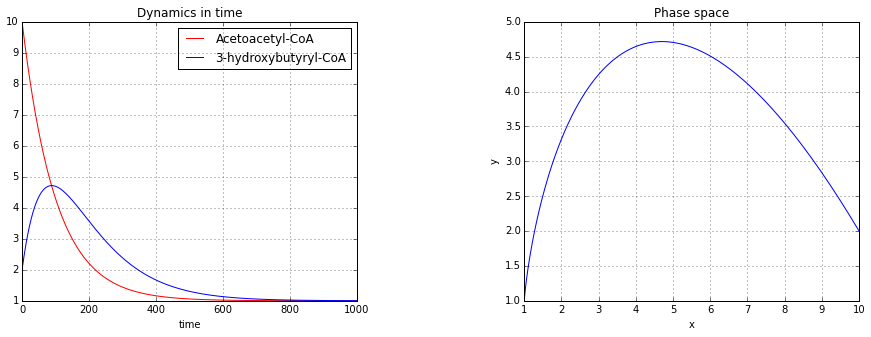

In [22]:
# Define constants
K_AtoB = 1
K_Hbd = 1
K_Crt = 1
K_Ter = 1
K_YciA = 1
K_CAR = 1
K_ADO = 1
H_2O = 1
ATP = 1

# A = Acetoacetyl-CoA
# B = Acetyl-CoA
# C = NADPH
# D = 3-hydroxybutyryl-CoA
# E = Crotonyl-CoA
# F = Butyryl-CoA
# G = Butyric-acid
# H = Butyraldehyde
# I = H_+
# J = O_2

# Define system in terms of separated differential equations
def r1(A,B,C):
    return K_AtoB*A - K_Hbd*B*C

def r2(A,C,D):
    return K_Hbd*A*C - K_Crt*D*H_2O

def r3(C,D,E):
    return  K_Crt*D*H_2O - K_Ter*E*C

def r4(E,C,F):
    return K_Ter*E*C - K_YciA*F*H_2O

def r5(F,G,C):
    return K_YciA*F*H_2O - K_CAR*G*C*H_2O*ATP

def r6(G,C,H,I,J):
    return K_CAR*G*C*H_2O*ATP - K_ADO*H*C**2*I**2*J**2

def r7(H,C,I,J):
    return K_ADO*H*C**2*I**2*J**2


# initialize lists containing values
x = []
y = []

#iv1, iv2 = initial values, dt = timestep, time = range
def sys(iv1, iv2, dt, time):
    # initial values:
    x.append(iv1)
    y.append(iv2)
    #z.append(iv3)
    # compute and fill lists
    for i in range(time):
        x.append(x[i] + (r1(1,x[i],1)) * dt)
        y.append(y[i] + (r2(x[i],1,y[i])) * dt)
        #z.append(z[i] + (h(x[i],y[i],z[i])) * dt)
    return x, y

sys(10, 2, 0.01, 1000)

#plot
fig = plt.figure(figsize=(15,5))
fig.subplots_adjust(wspace = 0.5, hspace = 0.3)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x, 'r-', label='Acetoacetyl-CoA')
ax1.plot(y, 'b-', label='3-hydroxybutyryl-CoA')
#ax1.plot(z, 'g-', label='prey')
ax1.set_title("Dynamics in time")
ax1.set_xlabel("time")
ax1.grid()
ax1.legend(loc='best')

ax2.plot(x, y, color="blue")
ax2.set_xlabel("x")
ax2.set_ylabel("y")  
ax2.set_title("Phase space")
ax2.grid()